In [92]:
import numpy as np  # linear algebra
import pandas as pd  # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # plotting
import seaborn as sns   # visualization
import sqlite3  # establishing connection to database

plt.rcParams['figure.figsize'] = (15, 5)

In [93]:
import mysql.connector
import config

connection = mysql.connector.connect(**config.connection())

In [94]:
def get_data(query):
    '''This function returns the data from the database'''
    cursor = connection.cursor()
    cursor.execute(query)
    data = cursor.fetchall()
    return data

In [95]:
get_data("SELECT * FROM employees LIMIT 10;")

[(10001,
  datetime.date(1953, 9, 2),
  'Georgi',
  'Facello',
  'M',
  datetime.date(1986, 6, 26)),
 (10002,
  datetime.date(1964, 6, 2),
  'Bezalel',
  'Simmel',
  'F',
  datetime.date(1985, 11, 21)),
 (10003,
  datetime.date(1959, 12, 3),
  'Parto',
  'Bamford',
  'M',
  datetime.date(1986, 8, 28)),
 (10004,
  datetime.date(1954, 5, 1),
  'Chirstian',
  'Koblick',
  'M',
  datetime.date(1986, 12, 1)),
 (10005,
  datetime.date(1955, 1, 21),
  'Kyoichi',
  'Maliniak',
  'M',
  datetime.date(1989, 9, 12)),
 (10006,
  datetime.date(1953, 4, 20),
  'Anneke',
  'Preusig',
  'F',
  datetime.date(1989, 6, 2)),
 (10007,
  datetime.date(1957, 5, 23),
  'Tzvetan',
  'Zielinski',
  'F',
  datetime.date(1989, 2, 10)),
 (10008,
  datetime.date(1958, 2, 19),
  'Saniya',
  'Kalloufi',
  'M',
  datetime.date(1994, 9, 15)),
 (10009,
  datetime.date(1952, 4, 19),
  'Sumant',
  'Peac',
  'F',
  datetime.date(1985, 2, 18)),
 (10010,
  datetime.date(1963, 6, 1),
  'Duangkaew',
  'Piveteau',
  'F',
  date

testing connection and query: create a dataframe with just the ten first employees in the employees table

In [96]:
df = pd.read_sql("SELECT * FROM employees LIMIT 10;", connection, index_col='emp_no', parse_dates=['birth_date'])

In [97]:
df.head()

,birth_date,first_name,last_name,gender,hire_date
emp_no,,,,,
10001,1953-09-02,Georgi,Facello,M,1986-06-26
10002,1964-06-02,Bezalel,Simmel,F,1985-11-21
10003,1959-12-03,Parto,Bamford,M,1986-08-28
10004,1954-05-01,Chirstian,Koblick,M,1986-12-01
10005,1955-01-21,Kyoichi,Maliniak,M,1989-09-12


In [98]:
df.shape

(10, 5)

In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 10001 to 10010
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   birth_date  10 non-null     datetime64[ns]
 1   first_name  10 non-null     object        
 2   last_name   10 non-null     object        
 3   gender      10 non-null     object        
 4   hire_date   10 non-null     object        
dtypes: datetime64[ns](1), object(4)
memory usage: 480.0+ bytes


In [100]:
df.isna().sum()

birth_date    0
first_name    0
last_name     0
gender        0
hire_date     0
dtype: int64

In [101]:
df.gender

emp_no
10001    M
10002    F
10003    M
10004    M
10005    M
10006    F
10007    F
10008    M
10009    F
10010    F
Name: gender, dtype: object

In [102]:
df.describe()

/var/folders/83/_gttb8hn67dfsswspxfpc23w0000gn/T/ipykernel_96306/3627053830.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df.describe()


,birth_date,first_name,last_name,gender,hire_date
count,10,10,10,10,10
unique,10,10,10,2,10
top,1953-09-02 00:00:00,Georgi,Facello,M,1986-06-26
freq,1,1,1,5,1
first,1952-04-19 00:00:00,NaN,NaN,NaN,NaN
last,1964-06-02 00:00:00,NaN,NaN,NaN,NaN


In [103]:
df.gender.unique()

array(['M', 'F'], dtype=object)

In [104]:
df.first_name.unique()

array(['Georgi', 'Bezalel', 'Parto', 'Chirstian', 'Kyoichi', 'Anneke',
       'Tzvetan', 'Saniya', 'Sumant', 'Duangkaew'], dtype=object)

In [105]:
df.columns

Index(['birth_date', 'first_name', 'last_name', 'gender', 'hire_date'], dtype='object')

In [106]:
df.birth_date.mean()

Timestamp('1957-03-11 21:36:00')

In [107]:
type(df)

pandas.core.frame.DataFrame

In [108]:
get_data('SELECT * FROM titles LIMIT 20;')

[(10001,
  'Senior Engineer',
  datetime.date(1986, 6, 26),
  datetime.date(9999, 1, 1)),
 (10002, 'Staff', datetime.date(1996, 8, 3), datetime.date(9999, 1, 1)),
 (10003,
  'Senior Engineer',
  datetime.date(1995, 12, 3),
  datetime.date(9999, 1, 1)),
 (10004, 'Engineer', datetime.date(1986, 12, 1), datetime.date(1995, 12, 1)),
 (10004,
  'Senior Engineer',
  datetime.date(1995, 12, 1),
  datetime.date(9999, 1, 1)),
 (10005,
  'Senior Staff',
  datetime.date(1996, 9, 12),
  datetime.date(9999, 1, 1)),
 (10005, 'Staff', datetime.date(1989, 9, 12), datetime.date(1996, 9, 12)),
 (10006,
  'Senior Engineer',
  datetime.date(1990, 8, 5),
  datetime.date(9999, 1, 1)),
 (10007,
  'Senior Staff',
  datetime.date(1996, 2, 11),
  datetime.date(9999, 1, 1)),
 (10007, 'Staff', datetime.date(1989, 2, 10), datetime.date(1996, 2, 11)),
 (10008,
  'Assistant Engineer',
  datetime.date(1998, 3, 11),
  datetime.date(2000, 7, 31)),
 (10009,
  'Assistant Engineer',
  datetime.date(1985, 2, 18),
  datetim

In [109]:
get_data(
    '''
    SELECT e.first_name, e.last_name, t.title FROM employees e INNER JOIN titles t ON e.emp_no = t.emp_no;
    '''
)

[('Georgi', 'Facello', 'Senior Engineer'),
 ('Bezalel', 'Simmel', 'Staff'),
 ('Parto', 'Bamford', 'Senior Engineer'),
 ('Chirstian', 'Koblick', 'Engineer'),
 ('Chirstian', 'Koblick', 'Senior Engineer'),
 ('Kyoichi', 'Maliniak', 'Senior Staff'),
 ('Kyoichi', 'Maliniak', 'Staff'),
 ('Anneke', 'Preusig', 'Senior Engineer'),
 ('Tzvetan', 'Zielinski', 'Senior Staff'),
 ('Tzvetan', 'Zielinski', 'Staff'),
 ('Saniya', 'Kalloufi', 'Assistant Engineer'),
 ('Sumant', 'Peac', 'Assistant Engineer'),
 ('Sumant', 'Peac', 'Engineer'),
 ('Sumant', 'Peac', 'Senior Engineer'),
 ('Duangkaew', 'Piveteau', 'Engineer'),
 ('Mary', 'Sluis', 'Staff'),
 ('Patricio', 'Bridgland', 'Engineer'),
 ('Patricio', 'Bridgland', 'Senior Engineer'),
 ('Eberhardt', 'Terkki', 'Senior Staff'),
 ('Berni', 'Genin', 'Engineer'),
 ('Guoxiang', 'Nooteboom', 'Senior Staff'),
 ('Kazuhito', 'Cappelletti', 'Staff'),
 ('Cristinel', 'Bouloucos', 'Senior Staff'),
 ('Cristinel', 'Bouloucos', 'Staff'),
 ('Kazuhide', 'Peha', 'Engineer'),
 ('

In [110]:
get_data(
    '''DESCRIBE employees;'''
)

[('emp_no', b'int', 'NO', 'PRI', None, ''),
 ('birth_date', b'date', 'NO', '', None, ''),
 ('first_name', b'varchar(14)', 'NO', '', None, ''),
 ('last_name', b'varchar(16)', 'NO', '', None, ''),
 ('gender', b"enum('M','F')", 'NO', '', None, ''),
 ('hire_date', b'date', 'NO', '', None, '')]

In [111]:
get_data(
    '''SHOW FULL TABLES;'''
)

[('current_dept_emp', 'VIEW'),
 ('departments', 'BASE TABLE'),
 ('dept_emp', 'BASE TABLE'),
 ('dept_emp_latest_date', 'VIEW'),
 ('dept_manager', 'BASE TABLE'),
 ('employees', 'BASE TABLE'),
 ('salaries', 'BASE TABLE'),
 ('titles', 'BASE TABLE')]

In [112]:
get_data(
    '''SELECT * FROM departments;'''
)

[('d009', 'Customer Service'),
 ('d005', 'Development'),
 ('d002', 'Finance'),
 ('d003', 'Human Resources'),
 ('d001', 'Marketing'),
 ('d004', 'Production'),
 ('d006', 'Quality Management'),
 ('d008', 'Research'),
 ('d007', 'Sales')]

In [113]:
get_data(
    '''SELECT * FROM salaries WHERE salary > (SELECT AVG(salary) FROM salaries);'''
)

[(10001, 66074, datetime.date(1988, 6, 25), datetime.date(1989, 6, 25)),
 (10001, 66596, datetime.date(1989, 6, 25), datetime.date(1990, 6, 25)),
 (10001, 66961, datetime.date(1990, 6, 25), datetime.date(1991, 6, 25)),
 (10001, 71046, datetime.date(1991, 6, 25), datetime.date(1992, 6, 24)),
 (10001, 74333, datetime.date(1992, 6, 24), datetime.date(1993, 6, 24)),
 (10001, 75286, datetime.date(1993, 6, 24), datetime.date(1994, 6, 24)),
 (10001, 75994, datetime.date(1994, 6, 24), datetime.date(1995, 6, 24)),
 (10001, 76884, datetime.date(1995, 6, 24), datetime.date(1996, 6, 23)),
 (10001, 80013, datetime.date(1996, 6, 23), datetime.date(1997, 6, 23)),
 (10001, 81025, datetime.date(1997, 6, 23), datetime.date(1998, 6, 23)),
 (10001, 81097, datetime.date(1998, 6, 23), datetime.date(1999, 6, 23)),
 (10001, 84917, datetime.date(1999, 6, 23), datetime.date(2000, 6, 22)),
 (10001, 85112, datetime.date(2000, 6, 22), datetime.date(2001, 6, 22)),
 (10001, 85097, datetime.date(2001, 6, 22), datetim

In [114]:
# get the employees count
get_data('''
SELECT COUNT(*) FROM employees;
''')

[(300026,)]

In [115]:
# get their first name only
get_data('''
SELECT DISTINCT first_name FROM employees;
''')

[('Georgi',),
 ('Bezalel',),
 ('Parto',),
 ('Chirstian',),
 ('Kyoichi',),
 ('Anneke',),
 ('Tzvetan',),
 ('Saniya',),
 ('Sumant',),
 ('Duangkaew',),
 ('Mary',),
 ('Patricio',),
 ('Eberhardt',),
 ('Berni',),
 ('Guoxiang',),
 ('Kazuhito',),
 ('Cristinel',),
 ('Kazuhide',),
 ('Lillian',),
 ('Mayuko',),
 ('Ramzi',),
 ('Shahaf',),
 ('Bojan',),
 ('Suzette',),
 ('Prasadram',),
 ('Yongqiao',),
 ('Divier',),
 ('Domenick',),
 ('Otmar',),
 ('Elvis',),
 ('Karsten',),
 ('Jeong',),
 ('Arif',),
 ('Bader',),
 ('Alain',),
 ('Adamantios',),
 ('Pradeep',),
 ('Huan',),
 ('Alejandro',),
 ('Weiyi',),
 ('Uri',),
 ('Magy',),
 ('Yishay',),
 ('Mingsen',),
 ('Moss',),
 ('Lucien',),
 ('Zvonko',),
 ('Florian',),
 ('Basil',),
 ('Yinghua',),
 ('Hidefumi',),
 ('Heping',),
 ('Sanjiv',),
 ('Mayumi',),
 ('Georgy',),
 ('Brendon',),
 ('Ebbe',),
 ('Berhard',),
 ('Breannda',),
 ('Tse',),
 ('Anoosh',),
 ('Gino',),
 ('Udi',),
 ('Satosi',),
 ('Kwee',),
 ('Claudi',),
 ('Charlene',),
 ('Margareta',),
 ('Reuven',),
 ('Hisao',),
 (

In [116]:
# get employees salary details
get_data('''
SELECT * FROM salaries WHERE salaries.emp_no = '10001'; 
''')

[(10001, 60117, datetime.date(1986, 6, 26), datetime.date(1987, 6, 26)),
 (10001, 62102, datetime.date(1987, 6, 26), datetime.date(1988, 6, 25)),
 (10001, 66074, datetime.date(1988, 6, 25), datetime.date(1989, 6, 25)),
 (10001, 66596, datetime.date(1989, 6, 25), datetime.date(1990, 6, 25)),
 (10001, 66961, datetime.date(1990, 6, 25), datetime.date(1991, 6, 25)),
 (10001, 71046, datetime.date(1991, 6, 25), datetime.date(1992, 6, 24)),
 (10001, 74333, datetime.date(1992, 6, 24), datetime.date(1993, 6, 24)),
 (10001, 75286, datetime.date(1993, 6, 24), datetime.date(1994, 6, 24)),
 (10001, 75994, datetime.date(1994, 6, 24), datetime.date(1995, 6, 24)),
 (10001, 76884, datetime.date(1995, 6, 24), datetime.date(1996, 6, 23)),
 (10001, 80013, datetime.date(1996, 6, 23), datetime.date(1997, 6, 23)),
 (10001, 81025, datetime.date(1997, 6, 23), datetime.date(1998, 6, 23)),
 (10001, 81097, datetime.date(1998, 6, 23), datetime.date(1999, 6, 23)),
 (10001, 84917, datetime.date(1999, 6, 23), datetim

In [117]:
# particular employee obtaining maximum salary details
get_data('''
SELECT * FROM salaries WHERE salaries.emp_no = '10001' AND 
salaries.to_date = (SELECT MAX(to_date) FROM salaries WHERE salaries.emp_no = '10001');
''')

[(10001, 88958, datetime.date(2002, 6, 22), datetime.date(9999, 1, 1))]

In [118]:
get_data(
    '''
    SELECT s1.* FROM salaries AS s1 LEFT JOIN salaries 
    AS s2 ON (s1.emp_no = s2.emp_no AND s1.from_date < s2.from_date) 
    WHERE s2.emp_no IS NULL AND s1.emp_no = '10001'; 
    '''
)

[(10001, 88958, datetime.date(2002, 6, 22), datetime.date(9999, 1, 1))]

In [119]:
# employee and salary table join to display the salary of the individual
get_data(
    '''
    SELECT e.emp_no, e.first_name, e.last_name, s.salary, s.from_date 
    FROM employees e INNER JOIN
    (SELECT emp_no, MAX(salary) AS SALARY, FROM_DATE FROM salaries GROUP BY emp_no) s
    ON (e.emp_no = s.emp_no) LIMIT 10;
    '''
)

[(10001, 'Georgi', 'Facello', 88958, datetime.date(1986, 6, 26)),
 (10002, 'Bezalel', 'Simmel', 72527, datetime.date(1996, 8, 3)),
 (10003, 'Parto', 'Bamford', 43699, datetime.date(1995, 12, 3)),
 (10004, 'Chirstian', 'Koblick', 74057, datetime.date(1986, 12, 1)),
 (10005, 'Kyoichi', 'Maliniak', 94692, datetime.date(1989, 9, 12)),
 (10006, 'Anneke', 'Preusig', 60098, datetime.date(1990, 8, 5)),
 (10007, 'Tzvetan', 'Zielinski', 88070, datetime.date(1989, 2, 10)),
 (10008, 'Saniya', 'Kalloufi', 52668, datetime.date(1998, 3, 11)),
 (10009, 'Sumant', 'Peac', 94443, datetime.date(1985, 2, 18)),
 (10010, 'Duangkaew', 'Piveteau', 80324, datetime.date(1996, 11, 24))]

In [120]:
# list all employees with the designation joining three tables
get_data(
    '''
    SELECT e.emp_no, e.first_name, e.last_name, s.salary, t.title
    FROM employees e
    INNER JOIN (SELECT emp_no, MAX(salary) AS salary 
    FROM salaries GROUP BY emp_no) s 
    ON s.emp_no = e.emp_no 
    INNER JOIN
    titles t ON t.emp_no = e.emp_no LIMIT 20;
    '''
)

[(10001, 'Georgi', 'Facello', 88958, 'Senior Engineer'),
 (10002, 'Bezalel', 'Simmel', 72527, 'Staff'),
 (10003, 'Parto', 'Bamford', 43699, 'Senior Engineer'),
 (10004, 'Chirstian', 'Koblick', 74057, 'Engineer'),
 (10004, 'Chirstian', 'Koblick', 74057, 'Senior Engineer'),
 (10005, 'Kyoichi', 'Maliniak', 94692, 'Senior Staff'),
 (10005, 'Kyoichi', 'Maliniak', 94692, 'Staff'),
 (10006, 'Anneke', 'Preusig', 60098, 'Senior Engineer'),
 (10007, 'Tzvetan', 'Zielinski', 88070, 'Senior Staff'),
 (10007, 'Tzvetan', 'Zielinski', 88070, 'Staff'),
 (10008, 'Saniya', 'Kalloufi', 52668, 'Assistant Engineer'),
 (10009, 'Sumant', 'Peac', 94443, 'Assistant Engineer'),
 (10009, 'Sumant', 'Peac', 94443, 'Engineer'),
 (10009, 'Sumant', 'Peac', 94443, 'Senior Engineer'),
 (10010, 'Duangkaew', 'Piveteau', 80324, 'Engineer'),
 (10011, 'Mary', 'Sluis', 56753, 'Staff'),
 (10012, 'Patricio', 'Bridgland', 54794, 'Engineer'),
 (10012, 'Patricio', 'Bridgland', 54794, 'Senior Engineer'),
 (10013, 'Eberhardt', 'Terk

In [121]:
# salaries for each designation ordered descendingly
get_data(
    '''
    SELECT new_table.title, MAX(new_table.salary) AS salary
    FROM (SELECT e.first_name, e.last_name, s.salary AS salary, t.title AS title
    FROM employees e 
    INNER JOIN 
    (SELECT emp_no, MAX(salary) AS salary FROM salaries GROUP BY emp_no) s 
    ON s.emp_no = e.emp_no
    INNER JOIN titles t ON t.emp_no = e.emp_no) 
    new_table GROUP BY new_table.title ORDER BY salary DESC;
    '''
)

[('Staff', 158220),
 ('Senior Staff', 158220),
 ('Technique Leader', 144434),
 ('Senior Engineer', 140784),
 ('Engineer', 140784),
 ('Assistant Engineer', 133712),
 ('Manager', 108407)]

In [122]:
# list employees and current department where they are working and their respective manager
get_data(
    '''
    SELECT e.emp_no, CONCAT(e.first_name, ' ', e.last_name) 
    AS Employee, e.gender as gender, d.dept_name AS department, d.dept_no,
    CONCAT(manager.first_name, ' ', manager.last_name) AS Manager
    FROM current_dept_emp cdept
    INNER JOIN employees e 
    ON e.emp_no = cdept.emp_no
    INNER JOIN departments d
    ON d.dept_no = cdept.dept_no
    INNER JOIN (SELECT dept_no AS dn, emp_no AS en FROM 
    dept_manager WHERE from_date IN (SELECT MAX(from_date) FROM dept_manager GROUP BY dept_no)) dm
    ON dm.dn = cdept.dept_no 
    INNER JOIN employees manager
    ON manager.emp_no = dm.en
    LIMIT 10;
    '''
)

[(13412, 'Ranga Erdmenger', 'M', 'Marketing', 'd001', 'Vishwani Minakawa'),
 (13411, 'Yonghong Himler', 'M', 'Marketing', 'd001', 'Vishwani Minakawa'),
 (13394, 'Anneke Lorys', 'M', 'Marketing', 'd001', 'Vishwani Minakawa'),
 (13364, 'Shuzo Andreotta', 'M', 'Marketing', 'd001', 'Vishwani Minakawa'),
 (13348, 'Leaf Wiegley', 'M', 'Marketing', 'd001', 'Vishwani Minakawa'),
 (13341, 'Bodh Doering', 'F', 'Marketing', 'd001', 'Vishwani Minakawa'),
 (13304, 'Hisao Wixon', 'M', 'Marketing', 'd001', 'Vishwani Minakawa'),
 (13300, 'Mountaz Denis', 'M', 'Marketing', 'd001', 'Vishwani Minakawa'),
 (13299, 'Guiseppe Butner', 'M', 'Marketing', 'd001', 'Vishwani Minakawa'),
 (13289, 'Berni Baer', 'F', 'Marketing', 'd001', 'Vishwani Minakawa')]

In [123]:
# list of employees whose salary is more than a manager
more_than_manager = get_data(
    '''
    SELECT e.emp_no,
    CONCAT(e.first_name, ' ', e.last_name) AS Employee,
    e.gender AS Gender,
    d.dept_name AS department, d.dept_no, s.salary AS Employee_Salary,
    manager.emp_no AS Manager_id,
    CONCAT(manager.first_name, ' ', manager.last_name)
    AS Manager, man_sal.salary AS Manager_Salary
    FROM current_dept_emp cdept
    INNER JOIN employees e
    ON e.emp_no = cdept.emp_no
    INNER JOIN departments d
    ON d.dept_no = cdept.dept_no
    INNER JOIN 
    (SELECT dept_no AS dn, emp_no AS en FROM 
    dept_manager WHERE from_date IN
    (SELECT MAX(from_date) FROM dept_manager GROUP BY dept_no)) dm
    ON dm.dn = cdept.dept_no
    INNER JOIN
    employees manager
    ON manager.emp_no = dm.en
    INNER JOIN
    (SELECT s1.* FROM salaries AS s1 
    LEFT JOIN salaries AS s2
    ON (s1.emp_no = s2.emp_no AND s1.from_date < s2.from_date)
    WHERE s2.from_date IS NULL) s
    ON s.emp_no = cdept.emp_no
    INNER JOIN 
    (SELECT s1.* FROM salaries AS s1 
    LEFT JOIN salaries AS s2
    ON (s1.emp_no = s2.emp_no AND s1.from_date < s2.from_date)
    WHERE s2.from_date IS NULL) man_sal
    ON man_sal.emp_no = manager.emp_no 
    WHERE s.salary > man_sal.salary
    LIMIT 10;
    '''
)

print(more_than_manager)

[(10001, 'Georgi Facello', 'M', 'Development', 'd005', 88958, 110567, 'Leon DasSarma', 74510), (10004, 'Chirstian Koblick', 'M', 'Production', 'd004', 74057, 110420, 'Oscar Ghazalie', 56654), (10005, 'Kyoichi Maliniak', 'M', 'Human Resources', 'd003', 94692, 110228, 'Karsten Sigstam', 65400), (10007, 'Tzvetan Zielinski', 'F', 'Research', 'd008', 88070, 111534, 'Hilary Kambil', 79393), (10009, 'Sumant Peac', 'F', 'Quality Management', 'd006', 94409, 110854, 'Dung Pesch', 72876), (10010, 'Duangkaew Piveteau', 'F', 'Quality Management', 'd006', 80324, 110854, 'Dung Pesch', 72876), (10013, 'Eberhardt Terkki', 'M', 'Human Resources', 'd003', 68901, 110228, 'Karsten Sigstam', 65400), (10018, 'Kazuhide Peha', 'F', 'Production', 'd004', 84672, 110420, 'Oscar Ghazalie', 56654), (10021, 'Ramzi Erde', 'M', 'Development', 'd005', 84169, 110567, 'Leon DasSarma', 74510), (10024, 'Suzette Pettey', 'F', 'Production', 'd004', 96646, 110420, 'Oscar Ghazalie', 56654)]


In [124]:
df = pd.read_sql(
    '''
    SELECT e.emp_no,
    CONCAT(e.first_name, ' ', e.last_name) AS Employee,
    e.gender AS Gender,
    d.dept_name AS department, d.dept_no, s.salary AS Employee_Salary,
    manager.emp_no AS Manager_id,
    CONCAT(manager.first_name, ' ', manager.last_name)
    AS Manager, man_sal.salary AS Manager_Salary
    FROM current_dept_emp cdept
    INNER JOIN employees e
    ON e.emp_no = cdept.emp_no
    INNER JOIN departments d
    ON d.dept_no = cdept.dept_no
    INNER JOIN 
    (SELECT dept_no AS dn, emp_no AS en FROM 
    dept_manager WHERE from_date IN
    (SELECT MAX(from_date) FROM dept_manager GROUP BY dept_no)) dm
    ON dm.dn = cdept.dept_no
    INNER JOIN
    employees manager
    ON manager.emp_no = dm.en
    INNER JOIN
    (SELECT s1.* FROM salaries AS s1 
    LEFT JOIN salaries AS s2
    ON (s1.emp_no = s2.emp_no AND s1.from_date < s2.from_date)
    WHERE s2.from_date IS NULL) s
    ON s.emp_no = cdept.emp_no
    INNER JOIN 
    (SELECT s1.* FROM salaries AS s1 
    LEFT JOIN salaries AS s2
    ON (s1.emp_no = s2.emp_no AND s1.from_date < s2.from_date)
    WHERE s2.from_date IS NULL) man_sal
    ON man_sal.emp_no = manager.emp_no 
    WHERE s.salary > man_sal.salary
    LIMIT 10;
    ''', connection, index_col='emp_no')

In [125]:
df.head(10)

,Employee,Gender,department,dept_no,Employee_Salary,Manager_id,Manager,Manager_Salary
emp_no,,,,,,,,
10001,Georgi Facello,M,Development,d005,88958,110567,Leon DasSarma,74510
10004,Chirstian Koblick,M,Production,d004,74057,110420,Oscar Ghazalie,56654
10005,Kyoichi Maliniak,M,Human Resources,d003,94692,110228,Karsten Sigstam,65400
10007,Tzvetan Zielinski,F,Research,d008,88070,111534,Hilary Kambil,79393
10009,Sumant Peac,F,Quality Management,d006,94409,110854,Dung Pesch,72876
10010,Duangkaew Piveteau,F,Quality Management,d006,80324,110854,Dung Pesch,72876
10013,Eberhardt Terkki,M,Human Resources,d003,68901,110228,Karsten Sigstam,65400
10018,Kazuhide Peha,F,Production,d004,84672,110420,Oscar Ghazalie,56654
10021,Ramzi Erde,M,Development,d005,84169,110567,Leon DasSarma,74510


In [126]:
df.shape

(10, 8)

In [127]:
df.describe()

,Employee_Salary,Manager_id,Manager_Salary
count,10.000000,10.000000,10.000000
mean,85489.800000,110609.200000,67492.700000
std,9082.188035,391.107771,8558.640962
min,68901.000000,110228.000000,56654.000000
25%,81285.250000,110420.000000,58840.500000
50%,86371.000000,110493.500000,69138.000000
75%,93046.250000,110782.250000,74101.500000
max,96646.000000,111534.000000,79393.000000


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 10001 to 10024
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Employee         10 non-null     object
 1   Gender           10 non-null     object
 2   department       10 non-null     object
 3   dept_no          10 non-null     object
 4   Employee_Salary  10 non-null     int64 
 5   Manager_id       10 non-null     int64 
 6   Manager          10 non-null     object
 7   Manager_Salary   10 non-null     int64 
dtypes: int64(3), object(5)
memory usage: 720.0+ bytes


In [129]:
df.isna().sum()

Employee           0
Gender             0
department         0
dept_no            0
Employee_Salary    0
Manager_id         0
Manager            0
Manager_Salary     0
dtype: int64

In [130]:
df.columns

Index(['Employee', 'Gender', 'department', 'dept_no', 'Employee_Salary',
       'Manager_id', 'Manager', 'Manager_Salary'],
      dtype='object')

<AxesSubplot:xlabel='Employee_Salary', ylabel='Manager_Salary'>

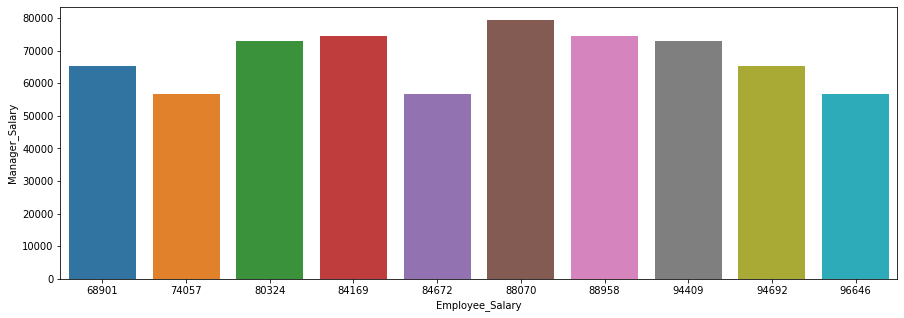

In [131]:
sns.barplot(x=df.Employee_Salary, y=df.Manager_Salary, data=df)

In [133]:
# each department and its total salary consumption arranged in descending order
get_data(
    '''
    SELECT d.dept_name AS department, d.dept_no, SUM(s.salary) AS Employee_Salary
    FROM current_dept_emp cdept
    INNER JOIN employees e
    ON e.emp_no = cdept.emp_no
    INNER JOIN departments d
    ON d.dept_no = cdept.dept_no
    INNER JOIN (SELECT dept_no as dn, emp_no as en 
    FROM dept_manager WHERE from_date IN
    (SELECT MAX(from_date) FROM dept_manager GROUP BY dept_no)) dm
    ON dm.dn = cdept.dept_no
    INNER JOIN employees manager
    ON manager.emp_no = dm.en
    INNER JOIN 
    (SELECT s1.* FROM salaries AS s1
    LEFT JOIN salaries AS s2
    ON (s1.emp_no = s2.emp_no AND s1.from_date < s2.from_date)
    WHERE s2.from_date IS NULL) s
    ON s.emp_no = cdept.emp_no
    GROUP BY department;
    '''
)

[('Development', 'd005', Decimal('5048065795')),
 ('Sales', 'd007', Decimal('4072233012')),
 ('Production', 'd004', Decimal('4383326395')),
 ('Human Resources', 'd003', Decimal('994036263')),
 ('Research', 'd008', Decimal('1268759713')),
 ('Quality Management', 'd006', Decimal('1159755611')),
 ('Customer Service', 'd009', Decimal('1424236382')),
 ('Marketing', 'd001', Decimal('1437988067')),
 ('Finance', 'd002', Decimal('1191910167'))]

In [134]:
df = pd.read_sql(
    '''
    SELECT d.dept_name AS department, d.dept_no, SUM(s.salary) AS Employee_Salary
    FROM current_dept_emp cdept
    INNER JOIN employees e
    ON e.emp_no = cdept.emp_no
    INNER JOIN departments d
    ON d.dept_no = cdept.dept_no
    INNER JOIN (SELECT dept_no as dn, emp_no as en 
    FROM dept_manager WHERE from_date IN
    (SELECT MAX(from_date) FROM dept_manager GROUP BY dept_no)) dm
    ON dm.dn = cdept.dept_no
    INNER JOIN employees manager
    ON manager.emp_no = dm.en
    INNER JOIN 
    (SELECT s1.* FROM salaries AS s1
    LEFT JOIN salaries AS s2
    ON (s1.emp_no = s2.emp_no AND s1.from_date < s2.from_date)
    WHERE s2.from_date IS NULL) s
    ON s.emp_no = cdept.emp_no
    GROUP BY department;
    ''',
    connection, index_col='dept_no'
)

In [136]:
print(df.head())

              department  Employee_Salary
dept_no                                  
d005         Development     5.048066e+09
d007               Sales     4.072233e+09
d004          Production     4.383326e+09
d003     Human Resources     9.940363e+08
d008            Research     1.268760e+09


In [137]:
print(df.shape)

(9, 2)


In [138]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, d005 to d002
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   department       9 non-null      object 
 1   Employee_Salary  9 non-null      float64
dtypes: float64(1), object(1)
memory usage: 216.0+ bytes
None


In [139]:
df.columns

Index(['department', 'Employee_Salary'], dtype='object')

In [140]:
df.department.value_counts()

Development           1
Sales                 1
Production            1
Human Resources       1
Research              1
Quality Management    1
Customer Service      1
Marketing             1
Finance               1
Name: department, dtype: int64

In [141]:
df.Employee_Salary.sum()

20980311405.0

In [143]:
df.Employee_Salary.value_counts()

5.048066e+09    1
4.072233e+09    1
4.383326e+09    1
9.940363e+08    1
1.268760e+09    1
1.159756e+09    1
1.424236e+09    1
1.437988e+09    1
1.191910e+09    1
Name: Employee_Salary, dtype: int64

<AxesSubplot:xlabel='Employee_Salary', ylabel='Employee_Salary'>

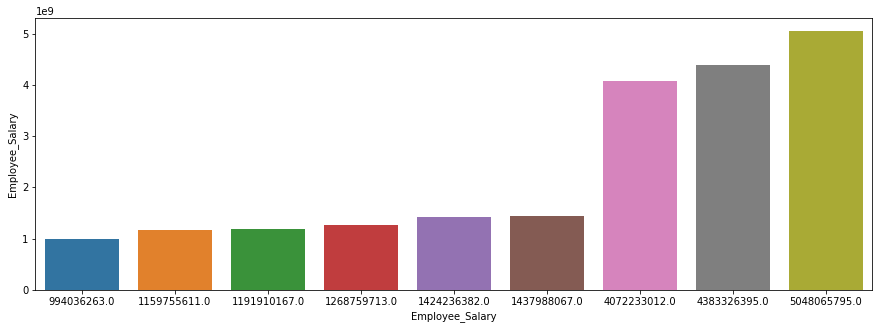

In [142]:
sns.barplot(x=df.Employee_Salary, y=df.Employee_Salary, data=df)

In [144]:
# get the second largest salary
get_data(
    '''
    SELECT MAX(salary) 
    FROM salaries 
    WHERE salary NOT IN
    (SELECT MAX(salary) FROM salaries);
    '''
)

[(157821,)]